### Diabetes Prediction System: A Logistic Regression Approach
This project aims to develop a logistic regression model to predict diabetes risk based on various health metrics. It includes data preprocessing, exploratory data analysis, and model evaluation using confusion matrices and classification reports. The findings highlight significant correlations, informing health risk assessments and interventions.

The dataset contains a list of features or variables, which appear to represent medical and demographic information. Here’s a brief explanation of each feature:

1. **ID**:  
   - A unique identifier for each individual or observation in the dataset. This helps in differentiating between records.

2. **No_Pation**:  
   - Likely a unique patient number, possibly referring to the number assigned to a patient for medical records. It may serve a similar purpose as `ID`, or could represent the number of times a patient has visited.

3. **Gender**:  
   - The gender of the individual, likely coded as 'M' for male and 'F' for female. It represents a demographic characteristic.

4. **AGE**:  
   - The age of the individual, most likely in years. This is a continuous variable and provides important demographic information.

5. **Urea**:  
   - Refers to **blood urea levels**, which are used to assess kidney function. Urea is a waste product formed in the liver and removed from the blood by the kidneys.
   
6. **Cr**:  
   - Short for **creatinine**, another important marker of kidney function. Elevated creatinine levels can indicate impaired kidney function.
   
7. **HbA1c**:  
   - This represents **Hemoglobin A1c**, which is a measure of blood sugar levels over the past 2-3 months. It is commonly used to monitor diabetes control.
   
8. **Chol**:  
   - Short for **cholesterol**, referring to the total cholesterol level in the blood. High cholesterol is a risk factor for cardiovascular diseases.

9. **TG**:  
   - Refers to **triglycerides**, a type of fat found in the blood. High triglyceride levels can increase the risk of heart disease.

10. **HDL**:  
    - **High-Density Lipoprotein (HDL)**, often referred to as "good" cholesterol. Higher HDL levels are generally considered beneficial for cardiovascular health.

11. **LDL**:  
    - **Low-Density Lipoprotein (LDL)**, often referred to as "bad" cholesterol. High LDL levels can lead to the buildup of fatty deposits in arteries, increasing the risk of heart disease and stroke.

12. **VLDL**:  
    - **Very Low-Density Lipoprotein (VLDL)**, another type of lipoprotein, primarily responsible for carrying triglycerides in the blood. High levels are associated with a higher risk of cardiovascular problems.

13. **BMI**:  
    - **Body Mass Index (BMI)**, a measure of body fat based on weight and height. It helps assess whether an individual is underweight, normal weight, overweight, or obese.

14. **CLASS**:  
    - This likely refers to the **target variable** or the **classification label** in the dataset, indicating different categories (e.g., diabetic vs. non-diabetic, healthy vs. unhealthy, or various stages of a medical condition). It could be used for classification tasks in predictive modeling.

### Overall:
These features appear to be from a **medical dataset** that involves patient demographic data (e.g., gender, age), metabolic markers (e.g., cholesterol, triglycerides), and clinical lab values (e.g., urea, creatinine) to possibly diagnose or monitor certain health conditions like **diabetes**, **kidney function**, and **cardiovascular health**.

Would you like a more detailed breakdown of any of these features or help with an analysis using them?

In [116]:
import pandas as pd

filepath = "C:/Users/USER/Documents/workspaces/diabetes.csv"

data = pd.read_csv(filepath)

data.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [118]:
data.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

#### checking for missing value and duplicate

In [119]:
data.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [120]:
data.duplicated().sum()

0

### checking for anomaly

In [121]:
data['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [122]:
data['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

### fixing gender anomaly

In [123]:
def replace_f(x):
    if x == "f":
        return "F"
    else:
        return x
    

In [124]:
data['Gender'] = data.Gender.apply(replace_f)

#### checking for correction

In [125]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

#### fixing class anomaly

In [126]:
def fix_class(x):
    if x.strip() == "N":
        return "N"
    elif x.strip() == "Y" or x.strip() == "P":
        return "Y"

In [127]:
data['CLASS'] = data['CLASS'].apply(fix_class)

#### CHECKING FOR CORRECTION ON CLASS

In [128]:
data['CLASS'].unique()

array(['N', 'Y'], dtype=object)

In [129]:
"DATA CLEANED"

'DATA CLEANED'

#### Exploratory data analysis 

### WHAT IS THEIR MEAN AGE

In [130]:
data['AGE'].mean()

53.528

#### MEAN AGE BY GENDER

In [131]:
data.groupby(["Gender"]).mean()['AGE']

C:\Users\USER\AppData\Local\Temp\ipykernel_8944\852053407.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(["Gender"]).mean()['AGE']


Gender
F    53.312644
M    53.693805
Name: AGE, dtype: float64

In [132]:
data.groupby(["Gender"]).std()['AGE']

C:\Users\USER\AppData\Local\Temp\ipykernel_8944\3351372762.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(["Gender"]).std()['AGE']


Gender
F    9.017581
M    8.631752
Name: AGE, dtype: float64

#### Interpretation

#### Simple Interpretation for female:

    The mean age for females is 53.31 years, indicating that, on average, females in the dataset are around 53.31 years old.
    The standard deviation is 9.02 years, which means most female ages fall within 9.02 years above or below the mean. Specifically, most females are between 44.29 years (53.31 - 9.02) and 62.33 years (53.31 + 9.02).

2. Detailed Interpretation:

    The mean age of 53.31 years indicates the central value (average) for female participants.
    The standard deviation of 9.02 years shows the variation around the mean. In a normal distribution:
        68% of female ages fall within one standard deviation, between 44.29 years and 62.33 years.
        95% of female ages will be within two standard deviations, between 35.27 years and 71.35 years.

This standard deviation suggests a moderate spread, meaning that while most females are near the mean age of 53.31, there is some variation across the ages.

#### Simple Interpretation for male:

    The mean age for males is 53.69 years. This means that, on average, males in the dataset are around 53.69 years old.   
    The standard deviation is 8.63 years, indicating that most male ages fall within 8.63 years above or below the mean. In other words, most males are between 45.06 years (53.69 - 8.63) and 62.32 years (53.69 + 8.63).
    
2. Detailed Interpretation:

    The mean age of 53.69 years suggests that the central value (average) for male participants is around 53.69 years.
    The standard deviation of 8.63 years shows how much individual ages deviate from this average. In a normal distribution, about:
        68% of male ages will fall within one standard deviation of the mean, between 45.06 years and 62.32 years.
        95% of male ages will fall within two standard deviations, between 36.43 years and 70.95 years.
The spread is moderate, meaning there is some variation in the ages, but most of the ages are clustered around the mean of 53.69 years.

#### Comparative analysis
When comparing the standard deviation (SD) of males and females, we observe that females have a higher SD (9.02) compared to males (8.63). Here’s a detailed interpretation of what that means:
Interpretation:

    Mean age for females is 53.31 years, with a standard deviation of 9.02 years.
    Mean age for males is 53.69 years, with a standard deviation of 8.63 years.

While both means are nearly the same, the higher standard deviation for females (9.02) indicates that there is slightly more variability in female ages compared to males. In other words, the ages of females are spread out more from their mean compared to males.
Comparison:

    For females, most ages lie between 44.29 years and 62.33 years (one SD from the mean).
    For males, most ages lie between 45.06 years and 62.32 years (one SD from the mean).

Though these ranges are quite similar, the higher SD for females implies that their age distribution has slightly more individuals further away from the average age compared to males. This suggests a greater diversity in age among the females in your dataset.

In essence, while the average age for both genders is almost the same, females show slightly more variation in age than males.

In [133]:
bmi_categories = {
    "Underweight": {
        "range": "< 18.5",
        "description": "Indicates a body weight that is too low for a healthy lifestyle."
    },
    "Normal weight": {
        "range": "18.5 - 24.9",
        "description": "Indicates a healthy body weight."
    },
    "Overweight": {
        "range": "25.0 - 29.9",
        "description": "Indicates excess body weight that may lead to health issues."
    },
    "Obesity Class 1": {
        "range": "30.0 - 34.9",
        "description": "Moderate obesity, which increases the risk of health problems."
    },
    "Obesity Class 2": {
        "range": "35.0 - 39.9",
        "description": "Severe obesity, significantly increasing health risks."
    },
    "Obesity Class 3": {
        "range": "≥ 40.0",
        "description": "Very severe or morbid obesity, with a high risk of serious health conditions."
    }
}


In [134]:
def classify_bmi(x):
    if x < 18.5:
        return "Underweight"
    elif 18.5 <= x <= 24.9:
        return "Normal weight"  # Changed from "Health" to "Normal weight"
    elif 25.0 <= x <= 29.9:
        return "Overweight"
    elif 30.0 <= x <= 34.9:
        return "Obesity Class 1"
    elif 35.0 <= x <= 39.9:
        return "Obesity Class 2"
    else:  # This covers x >= 40.0
        return "Obesity Class 3"

### ploting bmi

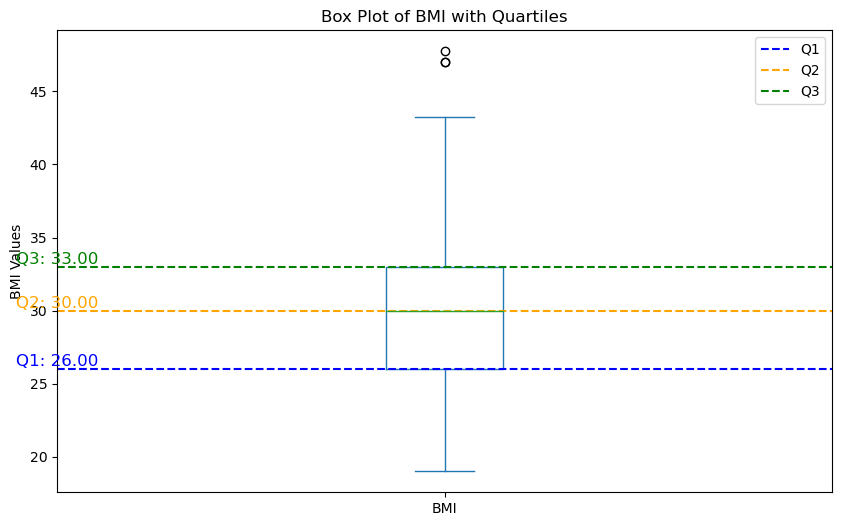

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data creation (replace this with your actual DataFrame)
# Assuming 'data' is your DataFrame and it contains a column 'BMI'
# data = pd.DataFrame({'BMI': [20, 22, 25, 30, 18, 24, 28, 27, 23, 26]})

# Calculate quartiles
Q1 = data['BMI'].quantile(0.25)
Q2 = data['BMI'].quantile(0.50)  # Median
Q3 = data['BMI'].quantile(0.75)

# Create the box plot for BMI
plt.figure(figsize=(10, 6))
box = data['BMI'].plot(kind='box')

# Add horizontal lines for each quartile
plt.axhline(Q1, color='blue', linestyle='--', label='Q1')
plt.axhline(Q2, color='orange', linestyle='--', label='Q2')
plt.axhline(Q3, color='green', linestyle='--', label='Q3')

# Annotate the quartile values
plt.text(0.5, Q1, f'Q1: {Q1:.2f}', color='blue', fontsize=12, ha='center', va='bottom')
plt.text(0.5, Q2, f'Q2: {Q2:.2f}', color='orange', fontsize=12, ha='center', va='bottom')
plt.text(0.5, Q3, f'Q3: {Q3:.2f}', color='green', fontsize=12, ha='center', va='bottom')

# Adding labels and title
plt.title('Box Plot of BMI with Quartiles')
plt.ylabel('BMI Values')
plt.legend()

# Show the plot
plt.show()


### CHECKING 

In [136]:
data['BMI CATEGORY'] = data['BMI'].apply(classify_bmi)

In [137]:
data['BMI CATEGORY'].unique()

array(['Normal weight', 'Overweight', 'Obesity Class 1',
       'Obesity Class 2', 'Obesity Class 3'], dtype=object)

In [138]:
data['BMI CATEGORY'].value_counts()

Obesity Class 1    359
Overweight         284
Normal weight      190
Obesity Class 2    158
Obesity Class 3      9
Name: BMI CATEGORY, dtype: int64

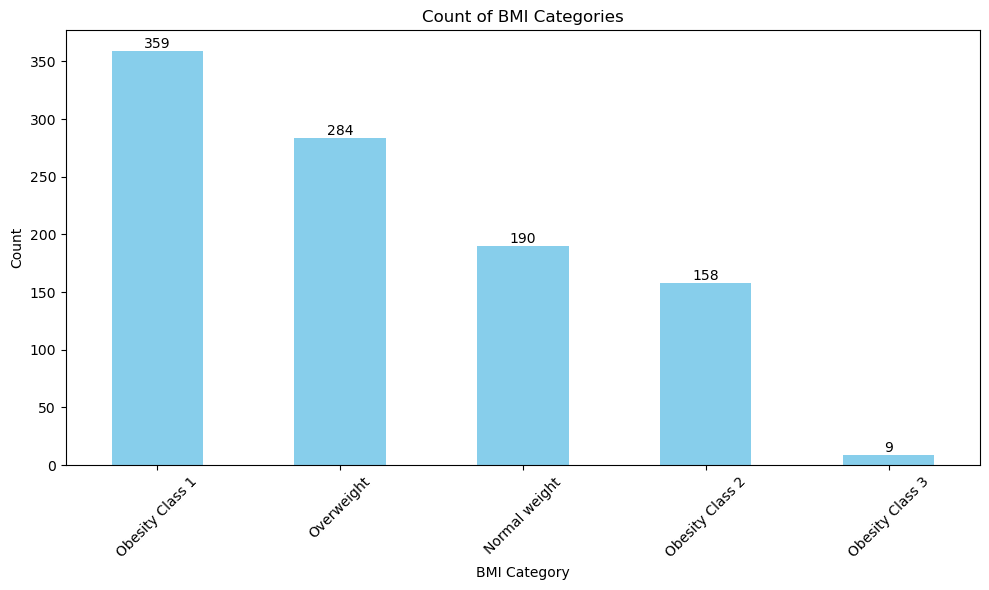

In [139]:
import matplotlib.pyplot as plt
import pandas as pd


# Count the occurrences of each BMI category
category_counts = data['BMI CATEGORY'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = category_counts.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Count of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')

# Annotate the bars with their values
for bar in bars.patches:
    plt.annotate(f'{bar.get_height()}', 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', fontsize=10)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()


###### Interpretation of BMI Category Counts

    Obesity Class 1 (359 individuals):
        This group represents the largest portion of the population analyzed, indicating that a significant number of individuals are classified as moderately obese. Obesity Class 1 typically refers to individuals with a BMI between 30 and 34.9. This high count suggests a prevalent issue of moderate obesity within the population, which may raise health concerns related to conditions such as cardiovascular disease, diabetes, and other obesity-related health issues.

    Overweight (284 individuals):
        The second largest category consists of individuals classified as overweight, with a BMI ranging from 25 to 29.9. The presence of 284 individuals in this category indicates that a substantial portion of the population is above the normal weight threshold but not yet classified as obese. This group is also at risk for similar health complications as those in Obesity Class 1, especially if weight management is not addressed.

    Normal Weight (190 individuals):
        This group includes individuals with a BMI between 18.5 and 24.9. The count of 190 indicates a smaller segment of the population is maintaining a healthy weight. While this is a positive sign, it suggests that there is room for improvement in promoting healthy weight management strategies among the larger population to increase the number of individuals in this category.

    Obesity Class 2 (158 individuals):
        Individuals in this category have a BMI between 35 and 39.9. With 158 individuals classified as Class 2 obesity, this represents a concerning health risk as they are classified as severely obese. This category may indicate a need for targeted interventions and healthcare resources to help individuals reduce weight and improve overall health.

    Obesity Class 3 (9 individuals):
        The smallest group, with only 9 individuals classified as Obesity Class 3 (BMI of 40 or greater), indicates extreme obesity. While this group is small in number, those affected are at a significantly higher risk for severe health issues. This emphasizes the importance of healthcare support for this vulnerable population segment.

Overall Summary

The data highlights a concerning trend of obesity within the population, particularly with a significant number of individuals falling into Obesity Class 1 and Overweight categories. The relatively low count of individuals in the Normal Weight and Obesity Class 3 categories indicates that there is an urgent need for public health interventions aimed at weight management and prevention strategies. The implications of these findings could guide health policies and programs focused on education, prevention, and treatment of obesity-related health issues.

In [140]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset into a DataFrame (assuming 'data' is already defined)



# Initialize LabelEncoder for encoding categorical variables
le = LabelEncoder()

# Encode the 'Gender' column
gender_encode = le.fit_transform(data['Gender'])
data['Gender'] = gender_encode

# Encode the 'CLASS' column into a numerical format
data['CLASS_ENCODED'] = le.fit_transform(data['CLASS'])

# Drop unnecessary columns from the DataFrame
data.drop(['ID', "No_Pation", "CLASS","BMI CATEGORY"], axis=1, inplace=True)
# Perform correlation analysis to identify relationships between features
correlation_matrix = data.corr()

# Print the correlation matrix to the console
print("\nCorrelation Matrix:")
correlation_matrix



Correlation Matrix:


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS_ENCODED
Gender,1.000000,0.021486,0.116311,0.154870,-0.009362,-0.064763,0.052111,-0.130130,0.054563,0.194120,0.072097,0.127381
AGE,0.021486,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956,0.358132
Urea,0.116311,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618,0.051303
Cr,0.154870,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746,0.034742
HbA1c,-0.009362,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350,0.497838
Chol,-0.064763,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678,0.154675
TG,0.052111,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757,0.175269
HDL,-0.130130,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409,-0.011517
LDL,0.054563,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322,-0.004698
VLDL,0.194120,-0.087903,-0.011191,0.009615,0.073462,0.076294,0.144570,-0.059275,0.062795,1.000000,0.198133,0.084305


### Full Analysis of Correlation with Diabetes Status

#### Overview of Correlation Analysis
The correlation analysis conducted on the dataset reveals various relationships between the variables (e.g., Age, Urea, HbA1c, BMI) and the encoded class variable (**CLASS_ENCODED**), which indicates the presence or absence of diabetes. 

### Key Findings

1. **Age and Diabetes**:
   - **Correlation Coefficient**: **0.36**
   - **Interpretation**: There is a moderate positive correlation between age and diabetes classification. This suggests that as age increases, the likelihood of being classified as diabetic also increases. Older adults may experience a higher risk due to factors such as declining metabolic health and lifestyle changes.

2. **HbA1c and Diabetes**:
   - **Correlation Coefficient**: **0.50**
   - **Interpretation**: A strong positive correlation between HbA1c levels and diabetes status indicates that higher HbA1c levels (which reflect long-term blood glucose levels) are significantly associated with being classified as diabetic. This underlines the importance of regular HbA1c monitoring in diabetes management.

3. **BMI and Diabetes**:
   - **Correlation Coefficient**: **0.49**
   - **Interpretation**: There is a significant positive correlation between BMI and diabetes classification. Individuals with higher BMI are more likely to be classified as diabetic. This finding reinforces the known relationship between obesity and diabetes, suggesting that weight management could be an effective preventive strategy.

4. **Gender and Diabetes**:
   - **Correlation Coefficient**: **0.13**
   - **Interpretation**: The slight positive correlation suggests that men may be more associated with diabetes compared to women. Although not a strong correlation, this finding highlights the need for gender-specific interventions and awareness programs targeting men.

5. **Urea and Diabetes**:
   - **Correlation Coefficient**: **0.05**
   - **Interpretation**: The weak positive correlation suggests a negligible relationship between urea levels and diabetes classification. This indicates that urea may not be a reliable indicator for diabetes risk in this dataset.

6. **Cholesterol (Chol) and Diabetes**:
   - **Correlation Coefficient**: **0.15**
   - **Interpretation**: The positive correlation indicates a potential link between cholesterol levels and diabetes. Higher cholesterol levels may contribute to diabetes risk, warranting further investigation.

7. **Triglycerides (TG) and Diabetes**:
   - **Correlation Coefficient**: **0.18**
   - **Interpretation**: A slight positive correlation indicates that higher triglyceride levels may also be associated with a greater likelihood of diabetes, consistent with existing research.

### Implications for Public Health Strategies

1. **Targeted Health Campaigns**:
   - Develop targeted campaigns aimed at educating older adults about diabetes prevention, emphasizing the importance of regular health screenings and lifestyle modifications. 

2. **Weight Management Programs**:
   - Implement programs focused on weight management and healthy eating to address obesity-related diabetes risk. Given the strong correlation between BMI and diabetes, these interventions could be pivotal in reducing diabetes prevalence.

3. **Regular Monitoring of HbA1c**:
   - Encourage regular monitoring of HbA1c levels among at-risk populations, particularly those with elevated BMI or age-related risks. Early detection through HbA1c testing can facilitate timely interventions.

4. **Gender-Specific Initiatives**:
   - Recognize the slight association of diabetes with gender and develop gender-specific initiatives to engage men in diabetes awareness and prevention strategies, particularly emphasizing the risks associated with lifestyle choices.

5. **Integrated Care Approaches**:
   - Incorporate a multi-faceted approach to diabetes management, integrating dietary, physical activity, and psychological support tailored to the needs of individuals based on their risk profiles, including age, gender, and BMI.

6. **Continued Research**:
   - Further research is needed to explore the nuances of how lifestyle factors, such as diet and physical activity, interact with biological factors (e.g., BMI, age) to influence diabetes risk. This knowledge can help refine intervention strategies.

### Conclusion
The correlation analysis reveals critical insights into factors associated with diabetes, highlighting the importance of age, HbA1c, BMI, and gender in diabetes classification. Public health strategies can leverage these findings to design more effective prevention and management programs, ultimately aiming to reduce the incidence and impact of diabetes within populations.

#### Model Development and training

In [142]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder



# Define features and target variable
X = data.drop('CLASS_ENCODED', axis=1)  # Features
y = data['CLASS_ENCODED']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.95


In [154]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
conf_matrix

Confusion Matrix:


array([[ 17,   4],
       [  6, 173]], dtype=int64)

#### Interpretation:

    True Positives (TP): 173
        This indicates that 173 patients who actually have diabetes were correctly predicted to have diabetes by the model.
    False Positives (FP): 4
        This indicates that 4 patients who do not have diabetes were incorrectly predicted to have diabetes. This is also known as a Type I error.
    False Negatives (FN): 6
        This indicates that 6 patients who actually have diabetes were incorrectly predicted not to have diabetes. This is also known as a Type II error.
    True Negatives (TN): 17
        This indicates that 17 patients who do not have diabetes were correctly predicted not to have diabetes.

#### Confusion Matrix Recap:


Confusion Matrix:
[[ 17,   4],   # Class 0 predictions
 [  6, 173]]   # Class 1 predictions

    True Negatives (TN): 17 (Actual class 0, correctly predicted as class 0)
    False Positives (FP): 4 (Actual class 0, incorrectly predicted as class 1)
    False Negatives (FN): 6 (Actual class 1, incorrectly predicted as class 0)
    True Positives (TP): 173 (Actual class 1, correctly predicted as class 1)

In [155]:
# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        21
           1       0.98      0.97      0.97       179

    accuracy                           0.95       200
   macro avg       0.86      0.89      0.87       200
weighted avg       0.95      0.95      0.95       200



##### The classification report provides a detailed overview of the performance of a classification model, specifically for a binary classification problem in this case (with classes labeled as 0 and 1). Here’s the interpretation of each section:
Class-Level Metrics:

    Class 0 (Negative Class)
        Precision (0.74): This indicates that 74% of the predictions made for class 0 were correct. Precision is the ratio of true positives (TP) to the sum of true positives and false positives (TP + FP).
        Recall (0.81): This means that the model correctly identified 81% of the actual class 0 instances. Recall is the ratio of true positives to the sum of true positives and false negatives (TP + FN).
        F1-score (0.77): This is the harmonic mean of precision and recall, providing a single metric that balances both. An F1-score of 0.77 indicates a reasonable balance between precision and recall for class 0.
        Support (21): This is the number of actual instances in the dataset for class 0. There were 21 true instances of class 0.

    Class 1 (Positive Class)
        Precision (0.98): The model achieved a precision of 98% for class 1, meaning that nearly all predictions made for this class were correct.
        Recall (0.97): The model successfully identified 97% of the actual class 1 instances, indicating that it missed only a small number of true positives.
        F1-score (0.97): The F1-score is very high at 0.97, suggesting excellent precision and recall for class 1.
        Support (179): There were 179 actual instances of class 1 in the dataset.

Overall Metrics:

    Accuracy (0.95): The overall accuracy of the model is 95%, meaning it correctly classified 95% of all instances in the dataset.

    Macro Average:
        Precision (0.86): This is the average precision across both classes, giving equal weight to both classes regardless of their support.
        Recall (0.89): The macro average recall also provides an average performance across classes.
        F1-score (0.87): The macro average F1-score shows a balance of precision and recall across both classes.

    Weighted Average:
        Precision (0.95): This takes into account the number of instances in each class, providing a more representative measure of precision given the class distribution.
        Recall (0.95): The weighted recall reflects the model's overall performance, weighted by the number of instances in each class.
        F1-score (0.95): The weighted F1-score indicates an excellent balance between precision and recall, considering the distribution of classes.

Implications:

    The model performs well in distinguishing between the two classes, particularly excelling in identifying class 1 (the positive class) with very high precision and recall.
    The performance on class 0 (the negative class) is decent but not as strong, suggesting that there may be room for improvement in correctly identifying instances of class 0.
    Given the imbalance in class support (21 instances of class 0 vs. 179 instances of class 1), the high metrics for class 1 contribute significantly to the overall performance, making it essential to focus on improving performance on class 0 if a balanced model is desired.